In [62]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [64]:
LoL = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Project 2/high_diamond_ranked_10min_league_of_legends.csv")
LoL.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [65]:
LoL.shape

(9879, 40)

In [66]:
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [67]:
LoL.duplicated().any()

False

In [68]:
LoL.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [69]:
#Determine if potential target vector is balanced
LoL.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [70]:
LoL.blueDragons.value_counts()

0    6303
1    3576
Name: blueDragons, dtype: int64

In [71]:
LoL.redDragons.value_counts()

0    5798
1    4081
Name: redDragons, dtype: int64

In [72]:
LoL.redFirstBlood.value_counts()

0    4987
1    4892
Name: redFirstBlood, dtype: int64

In [73]:
LoL.blueFirstBlood.value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

In [74]:
LoL.redTotalMinionsKilled.mean()

217.3492256301245

In [75]:
LoL.blueTotalMinionsKilled.mean()

216.6995647332726

In [76]:
Blue_Wins = LoL["blueWins"] == 1
Blue_Lose = LoL["blueWins"] == 0
Blue_Dragons = LoL["blueDragons"] == 1
Blue_First_Blood = LoL["blueFirstBlood"] == 1
Blue_Wins

0       False
1       False
2       False
3       False
4       False
        ...  
9874     True
9875     True
9876    False
9877    False
9878     True
Name: blueWins, Length: 9879, dtype: bool

In [77]:
Red_Dragons = LoL["redDragons"] == 1
Red_First_Blood = LoL["redFirstBlood"] == 1
Red_Dragons

0       False
1        True
2       False
3       False
4        True
        ...  
9874    False
9875    False
9876     True
9877    False
9878     True
Name: redDragons, Length: 9879, dtype: bool

In [78]:
Blue_Minions_Killed_Greater_217 = LoL["blueTotalMinionsKilled"] >= 217
Blue_Minions_Killed_Greater_217

0       False
1       False
2       False
3       False
4       False
        ...  
9874    False
9875     True
9876    False
9877     True
9878    False
Name: blueTotalMinionsKilled, Length: 9879, dtype: bool

In [79]:
Blue_Minions_Killed_Lesser_217 = LoL["blueTotalMinionsKilled"] < 217
Blue_Minions_Killed_Lesser_217

0        True
1        True
2        True
3        True
4        True
        ...  
9874     True
9875    False
9876     True
9877    False
9878     True
Name: blueTotalMinionsKilled, Length: 9879, dtype: bool

In [80]:
Red_Minions_Killed_Greater_217 = LoL["redTotalMinionsKilled"] >= 217
Red_Minions_Killed_Greater_217

0       False
1        True
2       False
3        True
4        True
        ...  
9874     True
9875    False
9876     True
9877     True
9878    False
Name: redTotalMinionsKilled, Length: 9879, dtype: bool

In [81]:
Red_Minions_Killed_Lesser_217 = LoL["redTotalMinionsKilled"] < 217
Red_Minions_Killed_Lesser_217

0        True
1       False
2        True
3       False
4       False
        ...  
9874    False
9875     True
9876    False
9877    False
9878     True
Name: redTotalMinionsKilled, Length: 9879, dtype: bool

In [93]:
BlueWins_BlueMinionsGreater = LoL[Blue_Wins & Blue_Minions_Killed_Greater_217]
BlueLose_BlueMinionsGreater = LoL[Blue_Lose & Blue_Minions_Killed_Greater_217]
#BlueWins_BlueMinionsGreater
BlueLose_BlueMinionsGreater

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
10,4452162573,0,20,3,1,4,4,6,0,0,0,0,15474,6.6,16611,231,28,331,-1585,23.1,1547.4,15,2,0,4,4,5,1,1,0,0,15143,7.2,18196,216,51,-331,1585,21.6,1514.3
22,4480384157,0,17,2,0,4,6,3,0,0,0,0,15773,7.0,17562,238,56,-1254,-567,23.8,1577.3,16,3,1,6,4,10,1,1,0,0,17027,7.0,18129,231,60,1254,567,23.1,1702.7
23,4520898233,0,78,4,0,4,3,4,2,1,1,0,15906,6.8,19219,238,67,406,1283,23.8,1590.6,15,3,1,3,4,3,0,0,0,0,15500,7.0,17936,220,64,-406,-1283,22.0,1550.0
27,4501319968,0,19,3,1,7,4,9,0,0,0,0,17226,7.0,18982,228,61,1857,2015,22.8,1722.6,14,4,0,4,7,2,1,1,0,0,15369,6.6,16967,202,49,-1857,-2015,20.2,1536.9
28,4519148589,0,105,5,1,8,6,13,1,1,0,0,17474,6.8,17436,217,53,1320,-413,21.7,1747.4,65,3,0,6,8,11,0,0,0,0,16154,6.8,17849,223,40,-1320,413,22.3,1615.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,4527742166,0,20,5,1,4,4,5,1,1,0,0,15903,7.0,17640,239,48,428,400,23.9,1590.3,17,3,0,4,4,6,0,0,0,0,15475,6.8,17240,217,57,-428,-400,21.7,1547.5
9851,4527637091,0,15,2,0,4,8,2,0,0,0,0,14709,6.6,17092,217,38,-2591,-1250,21.7,1470.9,13,3,1,8,4,10,1,1,0,0,17300,7.2,18342,236,55,2591,1250,23.6,1730.0
9853,4527865649,0,17,2,0,7,8,9,1,0,1,0,17394,6.8,17904,261,32,188,-676,26.1,1739.4,29,4,1,8,7,7,0,0,0,0,17206,7.0,18580,212,56,-188,676,21.2,1720.6
9858,4527782537,0,51,3,1,3,6,7,1,1,0,0,14857,6.8,16510,226,43,-959,-1248,22.6,1485.7,29,3,0,6,3,3,1,0,1,0,15816,6.8,17758,195,58,959,1248,19.5,1581.6


In [83]:
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

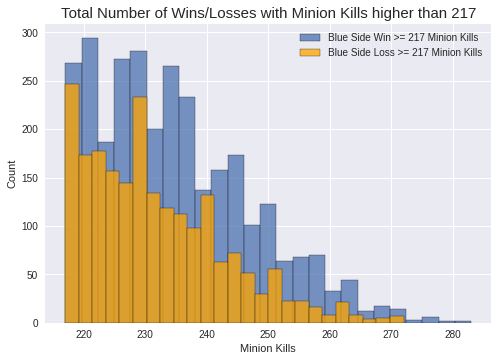

In [103]:
plt.style.use("seaborn")
sns.histplot(BlueWins_BlueMinionsGreater["blueTotalMinionsKilled"], 
             label = "Blue Side Win >= 217 Minion Kills",
             bins = 25, 
             edgecolor='black');
sns.histplot(BlueLose_BlueMinionsGreater["blueTotalMinionsKilled"], 
             label = "Blue Side Loss >= 217 Minion Kills", 
             bins = 25, 
             edgecolor='black', 
             color='orange');
plt.xlabel("Minion Kills");
plt.ylabel("Count");
plt.legend();
plt.title("Total Number of Wins/Losses with Minion Kills higher than 217", fontsize = 15);

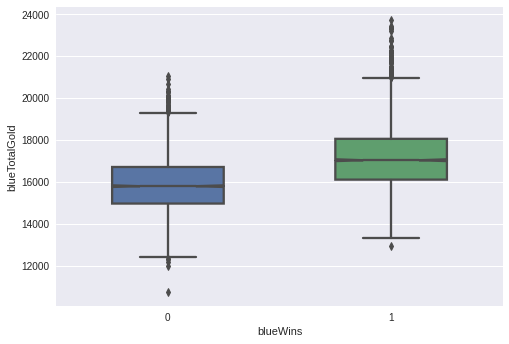

In [100]:
sns.boxplot(x=LoL['blueWins'], y=LoL['blueTotalGold'], linewidth=2.3, notch=True, width=.5);